# Setup

In [22]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

## import data

In [4]:
MER = pd.read_csv("../data/MERCleaned.csv")
MER

,Unnamed: 0,MatNo,Invoicedate,Distributor,GroupId,Type,Provincename,Material Name,New_Volume(L),Viscosity,isDelvac,ProductLine,GroupName,Points
0,0,145577,2023-09-06,A,ERW_AMBP2020110207,Reseller,Chachoengsao,M SUP Frict Fighter TBS 10W-30 4x7L/CAR,11676,10w-30,False,Super,M SUP Frict Fighter TBS 10W-30 4x7L/CAR,2
1,1,145577,2023-12-20,A,ERW_AMBP2020110207,Reseller,Chachoengsao,M SUP Frict Fighter TBS 10W-30 4x7L/CAR,5768,10w-30,False,Super,M SUP Frict Fighter TBS 10W-30 4x7L/CAR,2
2,2,143160,2023-08-11,A,ERW_AMBP2020110207,Reseller,Chachoengsao,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,11088,15w-40,True,Super,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,2
3,3,143160,2023-03-10,A,ERW_AMBP2020110291,Reseller,Nakhon Ratchasima,MOBIL DELVAC SUPER 1400 15W-40 4X6+1/CAR,2912,15w-40,True,Super,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,2
4,4,143160,2023-03-10,A,ERW_AMBP2020110291,Reseller,Nakhon Ratchasima,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,7168,15w-40,True,Super,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9424,140417,2023-03-11,C,ERW_C08P2020090135,Retails,Lampang,"MOBIL 1 TURBO DIESEL 5W-40, 12X1LT CTN",281,5w-40,False,One,MOBIL 1 TBD 5W-40 12X1L/CAR,10
9425,9425,140417,2023-07-18,C,ERW_C08P2020090145,Retails,Chiang Mai,"MOBIL 1 TURBO DIESEL 5W-40, 12X1LT CTN",354,5w-40,False,One,MOBIL 1 TBD 5W-40 12X1L/CAR,10
9426,9426,140635,2023-10-19,C,ERW_C08P2020090203,Retails,Chiang Mai,"MOBIL 1 FS X2 5W50, 12X1L CTN",281,5w-50,False,One,MOBIL 1 FS X2 5W-50 12x1L/CAR,10
9427,9427,140635,2023-11-29,C,ERW_C08P2020090203,Retails,Chiang Mai,"MOBIL 1 FS X2 5W50, 12X1L CTN",162,5w-50,False,One,MOBIL 1 FS X2 5W-50 12x1L/CAR,10


In [39]:
MER['Invoicedate'] = pd.to_datetime(MER['Invoicedate'])

# Topic

## Sales Volume and Growth Rate

### Volume timeline (Destributors)

In [52]:
AMer = MER[MER['Distributor'] == "A"][['New_Volume(L)', 'Invoicedate']].set_index('Invoicedate')\
                                                                .sort_index()
AMer

,New_Volume(L)
Invoicedate,
2023-01-04,500
2023-01-04,8946
2023-01-05,300
2023-01-05,1760
2023-01-05,9660
...,...
2023-12-23,11172
2023-12-23,11536
2023-12-23,2000


In [73]:
MER[MER['Distributor'] == "A"][['New_Volume(L)', 'Invoicedate', 'Type']].set_index('Invoicedate').duplicated().any()

np.True_

<Axes: title={'center': 'Volume Sale from Distributor D'}, xlabel='Invoicedate'>

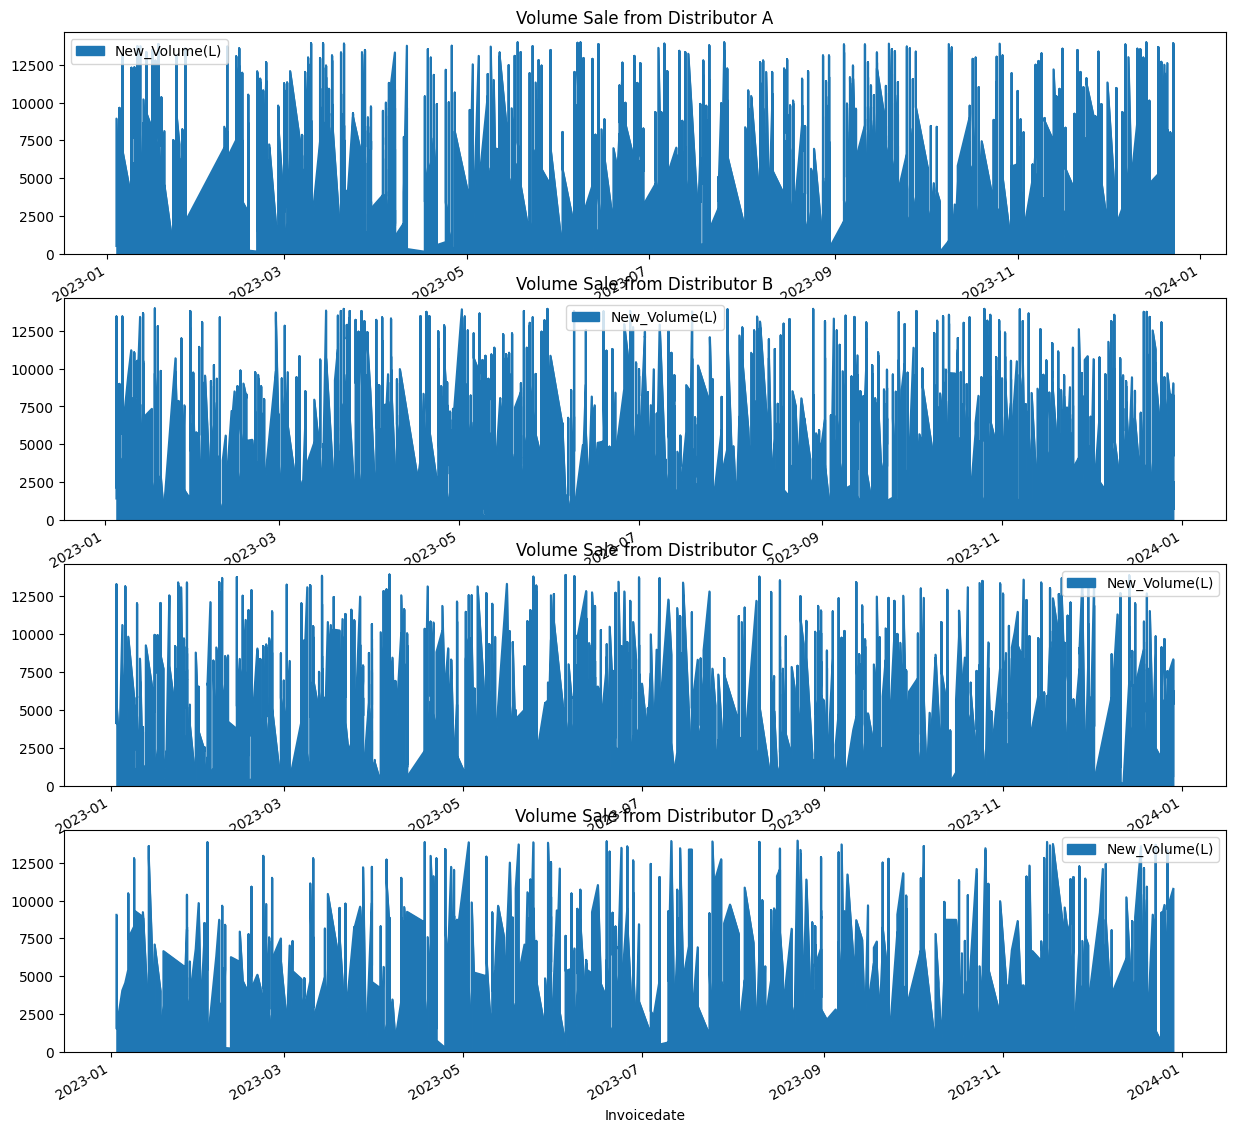

In [58]:


VolTimelinefig, VolTimelineAx = plt.subplots(4, 1)


MER[MER['Distributor'] == "A"][['New_Volume(L)', 'Invoicedate']].set_index('Invoicedate')\
                                                                .sort_index()\
                                                                .plot.area(title="Volume Sale from Distributor A" ,figsize=[15,15], ax=VolTimelineAx[0])

MER[MER['Distributor'] == "B"][['New_Volume(L)', 'Invoicedate']].set_index('Invoicedate')\
                                                                .sort_index()\
                                                                .plot.area(title="Volume Sale from Distributor B" , ax=VolTimelineAx[1])

MER[MER['Distributor'] == "C"][['New_Volume(L)', 'Invoicedate']].set_index('Invoicedate')\
                                                                .sort_index()\
                                                                .plot.area(title="Volume Sale from Distributor C" , ax=VolTimelineAx[2])

MER[MER['Distributor'] == "D"][['New_Volume(L)', 'Invoicedate']].set_index('Invoicedate')\
                                                                .sort_index()\
                                                                .plot.area(title="Volume Sale from Distributor D" , ax=VolTimelineAx[3])
